In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Code

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
iris.select_dtypes('number').corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Let's say we want to build a *Logistic Regression* model based on these features to predict the `species`.  
The `sepal_length` is highly correlated with `petal_length`, and `petal_width`. However, these two features are also very highly correlated with each other. Therefore, we will have to drop one of these features or perform dimensionality reduction.  
Let's perform dimensionality reduction using PCA.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :4], iris['species'], test_size=0.2, random_state=42)

### Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Obtain Covariance Matrix

In [9]:
covariance_matrix = np.cov([X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], X_train_scaled[:, 3]])

In [10]:
covariance_matrix

array([[ 1.00840336, -0.10782479,  0.86942015,  0.8082152 ],
       [-0.10782479,  1.00840336, -0.43571959, -0.3726137 ],
       [ 0.86942015, -0.43571959,  1.00840336,  0.97066591],
       [ 0.8082152 , -0.3726137 ,  0.97066591,  1.00840336]])

### Find EigenValues and EigenVectors

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_vectors

array([[ 0.5174275 , -0.39110948, -0.71486989,  0.26127227],
       [-0.27120139, -0.91812675,  0.25975661, -0.12656849],
       [ 0.58228005, -0.02180681,  0.14085828, -0.80039575],
       [ 0.56539237, -0.06000927,  0.63375586,  0.52448438]])

In [13]:
eigen_values

array([2.92644395, 0.92776828, 0.15976229, 0.01963892])

### Principal Components

In [14]:
princiapl_components = np.dot(X_train_scaled, eigen_vectors[:2].T)

In [15]:
princiapl_components[:5]

array([[-0.45935515, -0.94512146],
       [-0.60021732, -2.91039815],
       [ 0.328078  , -0.30956582],
       [-0.40411002, -0.51135811],
       [-0.35860685, -0.01321285]])

In [16]:
transformed_df = pd.DataFrame(princiapl_components, columns=['PC1', 'PC2'])
transformed_df['species'] = y_train.values

In [17]:
transformed_df.head()

,PC1,PC2,species
0,-0.459355,-0.945121,setosa
1,-0.600217,-2.910398,setosa
2,0.328078,-0.309566,versicolor
3,-0.404110,-0.511358,setosa
4,-0.358607,-0.013213,setosa


In [18]:
transformed_df.tail()

,PC1,PC2,species
115,0.340974,0.461990,versicolor
116,-0.218883,1.481392,virginica
117,-0.134206,-2.133189,setosa
118,0.291776,0.988628,versicolor
119,0.297457,-0.131499,virginica


In [19]:
transformed_df.select_dtypes('number').corr()

,PC1,PC2
PC1,1.000000,0.652712
PC2,0.652712,1.000000


### Selecting EigenVectors based on Variance Explained

In [20]:
pct_variance_explained = (eigen_values / np.sum(eigen_values)) * 100
pct_variance_explained

array([72.55142299, 23.00092184,  3.9607735 ,  0.48688166])

In [21]:
pct_variance_explained[0] + pct_variance_explained[1]

np.float64(95.55234483626009)

The first two eigen vectors explain 95.5% variance. Therefore, selecting these two vectors is sufficient for this dataset.

### Visualization in reduced dimensions

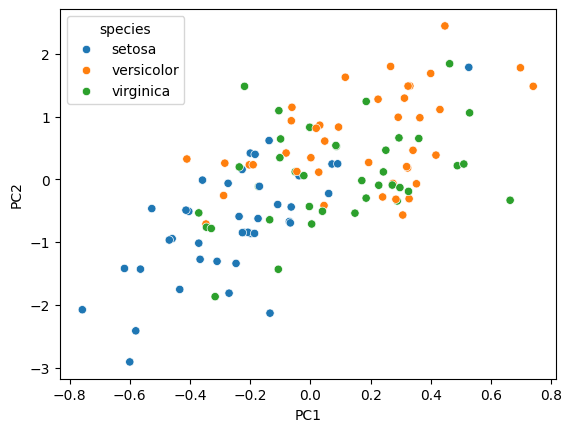

In [22]:
sns.scatterplot(x='PC1', y='PC2', data=transformed_df, hue='species')
plt.show()

# Using Scikit-Learn

In [23]:
diabetes = pd.read_csv('diabetes.csv')

In [24]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
X = diabetes.iloc[:, :-1]
y = diabetes['Outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling without PCA

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7532467532467533

### PCA without dimensionality reduction

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [35]:
X_train_trf.shape, X_test_trf.shape

((614, 8), (154, 8))

In [36]:
# Eigen Vectors
pca.components_

array([[ 0.16793909,  0.40331594,  0.35940377,  0.42091101,  0.4410162 ,
         0.44314374,  0.26489266,  0.20434231],
       [ 0.56890583,  0.18175008,  0.18057528, -0.36846708, -0.25430121,
        -0.13928963, -0.11462549,  0.61459575],
       [ 0.08210947, -0.5040699 ,  0.50768941,  0.26473964, -0.33153981,
         0.36197373, -0.4098705 , -0.0489745 ],
       [ 0.08338812, -0.3376096 ,  0.04472242,  0.02629609, -0.37571777,
         0.05807033,  0.8544277 ,  0.04233087],
       [ 0.49937943, -0.42183384, -0.4480174 ,  0.46810565,  0.29591603,
        -0.20340315, -0.06927146,  0.1381891 ],
       [ 0.14624249,  0.16510477, -0.58920488, -0.08156829, -0.29082442,
         0.70960755, -0.08999897, -0.03628012],
       [-0.59622466, -0.20821301, -0.15899215,  0.0851697 ,  0.04518287,
         0.10033664, -0.0422326 ,  0.74480775],
       [-0.09053478,  0.43322098, -0.07288607,  0.61907771, -0.56175305,
        -0.30796384, -0.06301124,  0.03427562]])

In [37]:
# Eigen Values
pca.explained_variance_

array([2.04599474, 1.76850275, 1.02571125, 0.89145215, 0.77852842,
       0.70519701, 0.41078642, 0.38687783])

In [38]:
# Explained Variance
pca.explained_variance_ratio_

array([0.25533281, 0.22070281, 0.12800509, 0.11125003, 0.09715756,
       0.08800606, 0.05126467, 0.04828097])

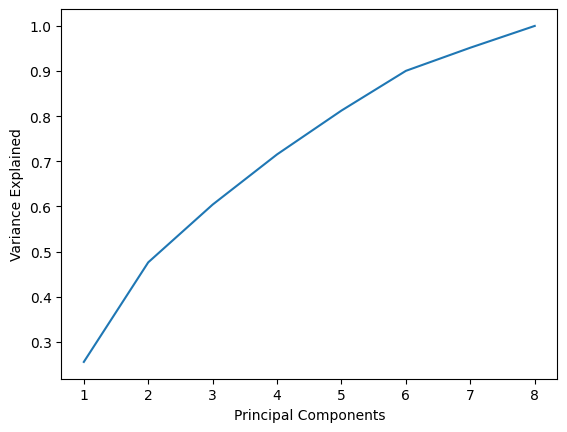

In [39]:
plt.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25533281, 0.47603562, 0.60404071, 0.71529074, 0.8124483 ,
       0.90045436, 0.95171903, 1.        ])

Since the first 6 eigen vectors explain 90% variance, I will 6 vectors for transformation.

### PCA with dimensionality reduction

In [41]:
pca = PCA(n_components = 6)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [42]:
X_train_trf.shape, X_test_trf.shape

((614, 6), (154, 6))

In [43]:
pca.components_

array([[ 0.16793909,  0.40331594,  0.35940377,  0.42091101,  0.4410162 ,
         0.44314374,  0.26489266,  0.20434231],
       [ 0.56890583,  0.18175008,  0.18057528, -0.36846708, -0.25430121,
        -0.13928963, -0.11462549,  0.61459575],
       [ 0.08210947, -0.5040699 ,  0.50768941,  0.26473964, -0.33153981,
         0.36197373, -0.4098705 , -0.0489745 ],
       [ 0.08338812, -0.3376096 ,  0.04472242,  0.02629609, -0.37571777,
         0.05807033,  0.8544277 ,  0.04233087],
       [ 0.49937943, -0.42183384, -0.4480174 ,  0.46810565,  0.29591603,
        -0.20340315, -0.06927146,  0.1381891 ],
       [ 0.14624249,  0.16510477, -0.58920488, -0.08156829, -0.29082442,
         0.70960755, -0.08999897, -0.03628012]])

In [44]:
np.cumsum(pca.explained_variance_ratio_)[-1]

np.float64(0.9004543598309438)

### Modeling with Dimensionality Reduction 

In [45]:
model = LogisticRegression()
model.fit(X_train_trf, y_train)

LogisticRegression()

In [46]:
y_pred = model.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.7727272727272727